In [1]:
import matplotlib.pyplot as plt
import numpy as np

from utilities import get_tex_label, get_color, latex_text_width_1col
from hazma.gamma_ray_parameters import energy_res_comptel
from hazma.scalar_mediator import ScalarMediator, HiggsPortal, HeavyQuark
from hazma.vector_mediator import VectorMediator, KineticMixing, QuarksOnly

In [2]:
mxs = np.geomspace(0.1, 250, 200)  # DM masses
m_meds = np.array([50, 175, 500])  # mediator masses
x_kd = 1e-6  # 1e-4 gives weaker CMB limits for the scalar models

# Models
models = np.array([[KineticMixing(1., 1e3, gvxx=1., eps=0.1),
                    QuarksOnly(1., 1e3, gvxx=1., gvuu=1., gvdd=-1., gvss=0.),
                    QuarksOnly(1., 1e3, gvxx=1., gvuu=1., gvdd=1., gvss=0.)],
                   [HiggsPortal(1., 1e3, gsxx=1., stheta=1e-1),
                    HeavyQuark(1., 1e3, gsxx=1., gsQ=1e-1, mQ=1e3, QQ=1.),
                    None]])

# Subplot titles indicating model parameters
titles = np.array([[r"$\epsilon = 0.1$",
                    r"$(g_{Vuu}, g_{Vdd}) = (1, -1)$",
                    r"$(g_{Vuu}, g_{Vdd}) = (1, 1)$"],
                   [r"$\sin\theta = 0.1$",
                    r"$(g_{S\Psi}, Q_\Psi) = (0.1, 1)$" + "\n" + r"$m_\Psi = 1$ GeV", ""]])

n_subplot_rows, n_subplot_cols = models.shape

/Users/acoogan/Dropbox/Physics/Sub-GeV_DM/Hazma/hazma/positron_spectra.py:55: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return positron_charged_pion.Spectrum(eng_p, eng_pi)
/Users/acoogan/Dropbox/Physics/Sub-GeV_DM/Hazma/hazma/positron_spectra.py:55: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return positron_charged_pion.Spectrum(eng_p, eng_pi)


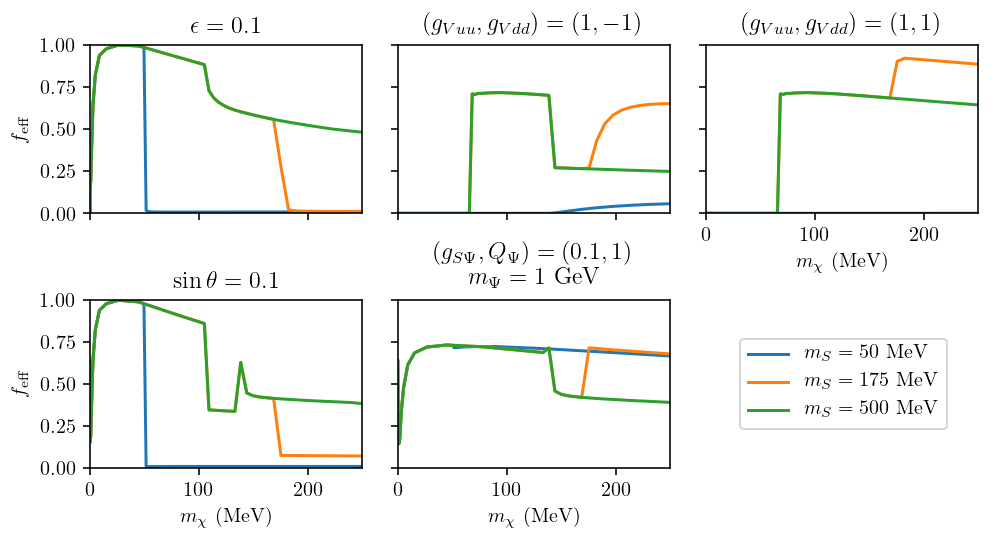

In [3]:
fig, axes = plt.subplots(
    n_subplot_rows,
    n_subplot_cols,
    sharex=True,
    sharey=True,
    figsize=(latex_text_width_1col, 0.55 * latex_text_width_1col))

# Delete last subplot: it will be replaced by the legend
fig.delaxes(axes[-1, -1])

for row in range(n_subplot_rows):  # loop over type of model
    for col in range(n_subplot_cols):  # loop over DM masses
        ax = axes[row, col]
        ax.set_title(titles[row, col])

        # Get the model
        model = models[row, col]
        if model is not None:
            # Iterate over mediator masses
            for m_med in m_meds:
                if isinstance(model, ScalarMediator):
                    model.ms = m_med
                    label = r"$m_S = %i$ MeV" % model.ms
                elif isinstance(model, VectorMediator):
                    model.mv = m_med
                    label = r"$m_V = %i$ MeV" % model.mv

                # Compute f_eff
                f_effs = np.zeros_like(mxs)
                for i, mx in enumerate(mxs):
                    model.mx = mx
                    f_effs[i] = model.f_eff(x_kd)

                # Plot f_eff
                ax.plot(mxs, f_effs, label=label)

# Formatting
axes[1, 0].set_xlabel(r"$m_\chi$ (MeV)")
axes[1, 1].set_xlabel(r"$m_\chi$ (MeV)")
axes[0, 2].set_xlabel(r"$m_\chi$ (MeV)")
axes[0, 0].set_ylabel(r"$f_{\mathrm{eff}}$")
axes[1, 0].set_ylabel(r"$f_{\mathrm{eff}}$")
axes[0, 0].set_xlim(mxs[[0, -1]])
axes[0, 0].set_ylim(0, 1)
axes[0, 2].xaxis.set_tick_params(labelbottom=True)

fig.tight_layout()
# Placing the legend before tight_layout call doesn't work
axes[1, 1].legend(loc="center right", bbox_to_anchor=(2.05, 0.5))
fig.savefig("figures/f_eff.pdf", bbox_inches="tight")
plt.show()